## Supervised learning assignment
- Name: Daan Steur
- Studentnumber: 379943
- Supervisor: Dr. Dave Langers
- Course: DSLS Data Science 3: Deep learning
- Date: 24th of june

# analysis of rice variety classification using deep learning

## Assignment
Rice, which is among the most widely produced grain products worldwide, has many genetic varieties. These varieties are separated from each other due to some of their features. These are usually features such as texture, shape, and color. With these features that distinguish rice varieties, it is possible to classify and evaluate the quality of seeds. In this study, Arborio, Basmati, Ipsala, Jasmine and Karacadag, which are five different varieties of rice often grown in Turkey, were used. A total of 75,000 grain images, 15,000 from each of these varieties, are included in the dataset. The successfully classification of these images is useful for evaluating the quality of the seeds.


## data source
[Rice Image Dataset](https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset)

In [126]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
from tensorflow import keras
import opendatasets as od
import glob as glob
import cv2, os


### Data Download

In [127]:
# # this command will automatically download the dataset in about 4 minutes
# # requirments for this command: pip install opendatasets
# od.download("https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset/download")

# # if the command is not working, you can download the dataset manually
# def create_dir(dir_name):
#     if not os.path.exists(dir_name):
#         os.makedirs(dir_name)
# # create_dir('rice-image-dataset')

# # Data download link
# download_link = "https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset/download"

# # after downloading the dataset, unzip it
# # !unzip rice-image-dataset.zip


### Exploration & preprocessing

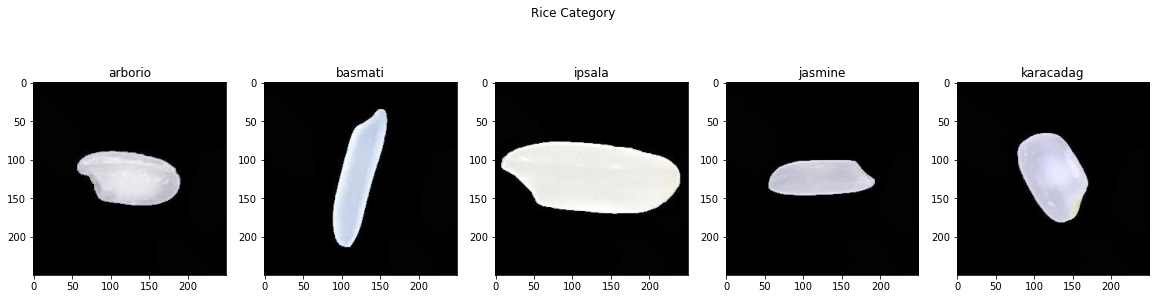

In [128]:
# Separating the categories
data_dir = 'rice-image-dataset/Rice_Image_Dataset/'
arborio = glob.glob(f'{data_dir}Arborio/*.jpg')[:1]
basmati = glob.glob(f'{data_dir}Basmati/*.jpg')[:1]
ipsala = glob.glob(f'{data_dir}Ipsala/*.jpg')[:1]
jasmine = glob.glob(f'{data_dir}Jasmine/*.jpg')[:1]
karacadag = glob.glob(f'{data_dir}Karacadag/*.jpg')[:1]

# Create a figure with all the rice categories
fig, ax = plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle('Rice Category')
arborio_image = img.imread(arborio[0])
basmati_image = img.imread(basmati[0])
ipsala_image = img.imread(ipsala[0])
jasmine_image = img.imread(jasmine[0])
karacadag_image = img.imread(karacadag[0])

ax[0].set_title('arborio')
ax[1].set_title('basmati')
ax[2].set_title('ipsala')
ax[3].set_title('jasmine')
ax[4].set_title('karacadag')

ax[0].imshow(arborio_image)
ax[1].imshow(basmati_image)
ax[2].imshow(ipsala_image)
ax[3].imshow(jasmine_image)
ax[4].imshow(karacadag_image)

Found 60000 images belonging to 5 classes.
(20, 100, 100, 3) float32 (20, 5) float32


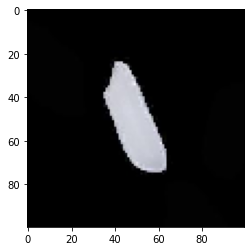

Found 15000 images belonging to 5 classes.
(20, 100, 100, 3) float32 (20, 5) float32


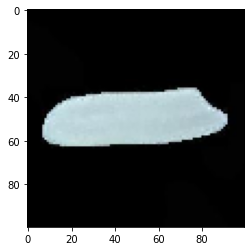

In [129]:
image_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

train_generator = image_generator.flow_from_directory(shuffle=True,
                                                      directory=data_dir,
                                                      batch_size=20,
                                                      color_mode='rgb',
                                                      target_size=(100,100),
                                                      subset='training',
                                                      class_mode='categorical')

for x_train, y_train in train_generator:
    print(x_train.shape, x_train.dtype, y_train.shape, y_train.dtype)
    break
plt.imshow(x_train[1])
plt.show()

test_generator = image_generator.flow_from_directory(shuffle=True,
                                                      directory=data_dir,
                                                      batch_size=20,
                                                      color_mode='rgb',
                                                      target_size=(100,100),
                                                      subset='validation',
                                                      class_mode='categorical')
for x_test, y_test in test_generator:
    print(x_test.shape, x_test.dtype, y_test.shape, y_test.dtype)
    break

plt.imshow(x_test[1])
plt.show()
                                                      
                                            

In [153]:
y_test

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

tried three difference target sizes, 250, which was the standard image size, 200 and 100,
ultimately 100 still gives enough detail for good training, lower is not recommended, as the resolutions becomes questionable.

### Baseline model

In [130]:
# reshape into 2d array for baseline model

#sklearn expects i/p to be 2d array-model.fit(x_train,y_train)=>reshape to 2d array
nsamples, nx, ny, nrgb = x_train.shape
x_train2 = x_train.reshape((nsamples,nx*ny*nrgb))

#so,eventually,model.predict() should also be a 2d input

# x_test = x_test/255.0
nsamples, nx, ny, nrgb = x_test.shape
x_test2 = x_test.reshape((nsamples,nx*ny*nrgb))


print(x_train2.shape, x_test2.shape)

(20, 30000) (20, 30000)


For the baseline I have chooses to pick Random forest classification model, as i knew that This algorithm is increasingly being applied to satellite and aerial image classification. So i have chosen this model for its uses in image classification. just to test if the model is working for this instance as well.

In [151]:
# sklearn create a Regression model for image classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

model = RandomForestClassifier()
fit = model.fit(x_train2, y_train)

y_pred = model.predict(x_train2)
y_pred


# evaluate

print(classification_report(y_pred, y_test))


1.0
              precision    recall  f1-score   support

           0       0.20      0.33      0.25         3
           1       0.50      0.67      0.57         3
           2       0.00      0.00      0.00         3
           3       0.50      0.29      0.36         7
           4       0.00      0.00      0.00         4

   micro avg       0.25      0.25      0.25        20
   macro avg       0.24      0.26      0.24        20
weighted avg       0.28      0.25      0.25        20
 samples avg       0.25      0.25      0.25        20



### Fully-connected neural network model

In [132]:
# clear previous models to make sure all names stay accurate for plotting
keras.backend.clear_session()

In [133]:
# neural network
neural = keras.models.Sequential()
# add input layer
neural.add(keras.layers.InputLayer(input_shape=(100,100,3), name='input'))
neural.add(keras.layers.Flatten(name='flatten'))
# neural.add(keras.layers.Dense(units=64, activation='relu', name='dense3'))
# neural.add(keras.layers.Dense(units=32, activation='relu', name='dense4'))
neural.add(keras.layers.Dense(units=16, activation='relu', name='dense5'))
# output layer
neural.add(keras.layers.Dense(units=5, activation='softmax', name = 'output'))
neural.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 30000)             0         
                                                                 
 dense5 (Dense)              (None, 16)                480016    
                                                                 
 output (Dense)              (None, 5)                 85        
                                                                 
Total params: 480,101
Trainable params: 480,101
Non-trainable params: 0
_________________________________________________________________


In [134]:
# compile
neural.compile(loss=keras.losses.CategoricalCrossentropy(),
                  optimizer=keras.optimizers.Adam(),
                  metrics=[keras.metrics.CategoricalAccuracy(), keras.metrics.AUC()])

In [135]:
# fit 
history_neural = neural.fit(
    train_generator,
    epochs=10,
    steps_per_epoch= 100,
    validation_data=test_generator,
    validation_steps=25,
    verbose=2)

history_neural.history.keys()

Epoch 1/10
100/100 [==============================] - 10s 85ms/step - loss: 0.8756 - categorical_accuracy: 0.6845 - auc: 0.9081 - val_loss: 0.5115 - val_categorical_accuracy: 0.8180 - val_auc: 0.9693
Epoch 2/10
100/100 [==============================] - 7s 74ms/step - loss: 0.5062 - categorical_accuracy: 0.8530 - auc: 0.9691 - val_loss: 0.4058 - val_categorical_accuracy: 0.8620 - val_auc: 0.9789
Epoch 3/10
100/100 [==============================] - 8s 77ms/step - loss: 0.3566 - categorical_accuracy: 0.9050 - auc: 0.9827 - val_loss: 0.2957 - val_categorical_accuracy: 0.9120 - val_auc: 0.9897
Epoch 4/10
100/100 [==============================] - 8s 76ms/step - loss: 0.2964 - categorical_accuracy: 0.9205 - auc: 0.9882 - val_loss: 0.2854 - val_categorical_accuracy: 0.9340 - val_auc: 0.9887
Epoch 5/10
100/100 [==============================] - 8s 75ms/step - loss: 0.3173 - categorical_accuracy: 0.8965 - auc: 0.9856 - val_loss: 0.3413 - val_categorical_accuracy: 0.9020 - val_auc: 0.9839
Epoc

dict_keys(['loss', 'categorical_accuracy', 'auc', 'val_loss', 'val_categorical_accuracy', 'val_auc'])

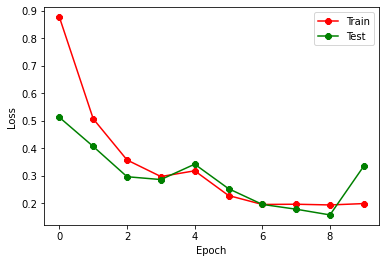

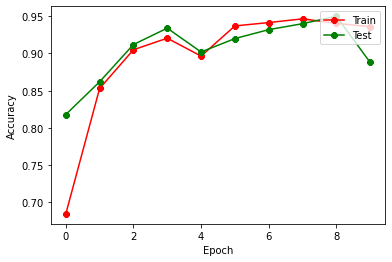

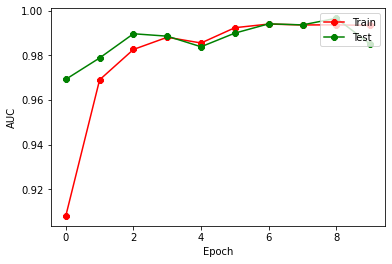

In [136]:
plt.plot(history_neural.history['loss'], marker='8', c='red', label='loss')
plt.plot(history_neural.history['val_loss'], marker='8', c='green', label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

plt.plot(history_neural.history['categorical_accuracy'], marker='8', c='red', label='acc')
plt.plot(history_neural.history['val_categorical_accuracy'], marker='8', c='green', label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

plt.plot(history_neural.history['auc'], marker='8', c='red', label='auc')
plt.plot(history_neural.history['val_auc'], marker='8', c='green', label='val_auc')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


### Regularized convolutional neural network model

In [137]:
# clear previous models to make sure all names stay accurate for plotting
keras.backend.clear_session()

In [138]:
# convolutional neural network cov = keras.models.Sequential()

cov.add(keras.layers.InputLayer(input_shape=(100,100, 3),name='input'))
cov.add(keras.layers.Conv2D(filters = 16, kernel_size=(3,3), activation=keras.activations.relu, name='conv_1'))
cov.add(keras.layers.Conv2D(filters = 16, kernel_size=(3,3), activation=keras.activations.relu, name='conv_2'))
cov.add(keras.layers.MaxPooling2D(pool_size=(2,2), name='pool_1'))

cov.add(keras.layers.Conv2D(filters = 32, kernel_size=(3,3), activation=keras.activations.relu, name='conv_3'))
cov.add(keras.layers.Conv2D(filters = 32, kernel_size=(3,3), activation=keras.activations.relu, name='conv_4'))
cov.add(keras.layers.MaxPooling2D(pool_size=(2,2), name='pool_2'))

cov.add(keras.layers.Conv2D(filters = 64, kernel_size=(3,3), activation=keras.activations.relu, name='conv_5'))
cov.add(keras.layers.Conv2D(filters = 64, kernel_size=(3,3), activation=keras.activations.relu, name='conv_6'))
cov.add(keras.layers.MaxPooling2D(pool_size=(2,2), name='pool_3'))

cov.add(keras.layers.Conv2D(filters = 128, kernel_size=(3,3), activation=keras.activations.relu, name='conv_7'))
cov.add(keras.layers.Conv2D(filters = 128, kernel_size=(3,3), activation=keras.activations.relu, name='conv_8'))
cov.add(keras.layers.MaxPooling2D(pool_size=(2,2), name='pool_4'))

cov.add(keras.layers.Flatten(name='flatten'))
cov.add(keras.layers.Dense(units=128, activation='relu', name='dense_1'))
cov.add(keras.layers.Dense(units=64, activation=keras.activations.relu, name='hidden_1'))
cov.add(keras.layers.Dense(units=32, activation=keras.activations.relu, name='hidden_2'))
cov.add(keras.layers.Dense(units=5, activation=keras.activations.softmax, name='output'))

cov.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 98, 98, 16)        448       
                                                                 
 conv_2 (Conv2D)             (None, 96, 96, 16)        2320      
                                                                 
 pool_1 (MaxPooling2D)       (None, 48, 48, 16)        0         
                                                                 
 conv_3 (Conv2D)             (None, 46, 46, 32)        4640      
                                                                 
 conv_4 (Conv2D)             (None, 44, 44, 32)        9248      
                                                                 
 pool_2 (MaxPooling2D)       (None, 22, 22, 32)        0         
                                                                 
 conv_5 (Conv2D)             (None, 20, 20, 64)        1

In [139]:
# compile
cov.compile(loss=keras.losses.CategoricalCrossentropy(),
                  optimizer=keras.optimizers.Adam(),
                  metrics=[keras.metrics.CategoricalAccuracy(), keras.metrics.AUC()])

In [140]:
# fit 
history_cov = cov.fit(
    train_generator,
    epochs=10,
    steps_per_epoch= 100,
    validation_data=test_generator,
    validation_steps=25,
    verbose=2)

history_cov.history.keys()

Epoch 1/10
100/100 [==============================] - 40s 367ms/step - loss: 0.8980 - categorical_accuracy: 0.6110 - auc: 0.8893 - val_loss: 0.1699 - val_categorical_accuracy: 0.9320 - val_auc: 0.9956
Epoch 2/10
100/100 [==============================] - 36s 357ms/step - loss: 0.2687 - categorical_accuracy: 0.8990 - auc: 0.9886 - val_loss: 0.1632 - val_categorical_accuracy: 0.9420 - val_auc: 0.9952
Epoch 3/10
100/100 [==============================] - 37s 365ms/step - loss: 0.2114 - categorical_accuracy: 0.9255 - auc: 0.9922 - val_loss: 0.1832 - val_categorical_accuracy: 0.9480 - val_auc: 0.9943
Epoch 4/10
100/100 [==============================] - 41s 408ms/step - loss: 0.1914 - categorical_accuracy: 0.9340 - auc: 0.9936 - val_loss: 0.1626 - val_categorical_accuracy: 0.9500 - val_auc: 0.9966
Epoch 5/10
100/100 [==============================] - 40s 404ms/step - loss: 0.2131 - categorical_accuracy: 0.9230 - auc: 0.9922 - val_loss: 0.1520 - val_categorical_accuracy: 0.9420 - val_auc: 0.

dict_keys(['loss', 'categorical_accuracy', 'auc', 'val_loss', 'val_categorical_accuracy', 'val_auc'])

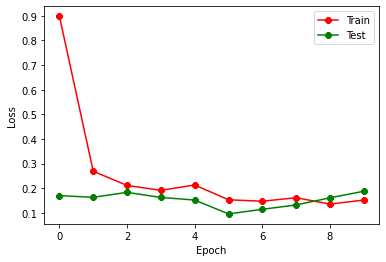

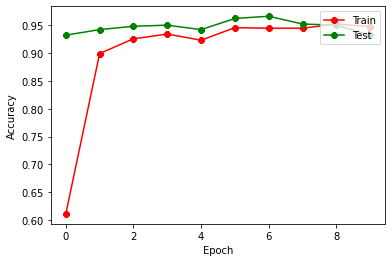

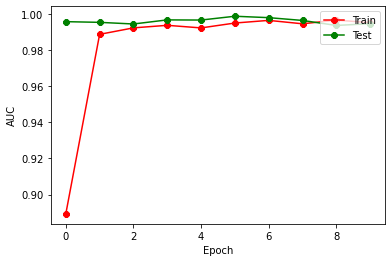

In [141]:
# evaluate

plt.plot(history_cov.history['loss'], marker='8', c='red', label='loss')
plt.plot(history_cov.history['val_loss'], marker='8', c='green', label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

plt.plot(history_cov.history['categorical_accuracy'], marker='8', c='red', label='acc')
plt.plot(history_cov.history['val_categorical_accuracy'], marker='8', c='green', label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


plt.plot(history_cov.history['auc'], marker='8', c='red', label='auc')
plt.plot(history_cov.history['val_auc'], marker='8', c='green', label='val_auc')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [172]:
result = cov.evaluate(test_generator, batch_size=20)
# print loss, accuracy and auc
print("Test loss:", result[0], "\n Test accuracy:", result[1], "\n Test AUC:", result[2])


268/750 [=========>....................] - ETA: 1:29 - loss: 0.1650 - categorical_accuracy: 0.9438 - auc: 0.9946

KeyboardInterrupt: 

In [161]:
train_generator

### Summary

Baseline: 

Neural network: 

Convolution neural network

### improvements to be made

fine tune the model etc etc etc